In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

In [7]:
def RandomWalk(x):
    dim=np.size(x)
    walk_set=[-1,1]

    for i in range(dim):

        x[i]=x[i]+0.01*np.random.choice(walk_set)

    return x

In [9]:
def exploit_explore(epsilon, Q):
# This function returns an action chosen by epsilon-greedy algorithm
#applied to the current action value vector Q
    i=np.argmax(Q)
    dim=np.size(Q)
    action_space=range(0,dim,1)
    sample=np.random.uniform(0,1)
    if sample<=1-epsilon:
        return i
    else:
        np.delete(action_space,i)
    return np.random.choice(action_space)

In [19]:
def multiarm_varyingstep(epsilon=0.1, max_iter=1000, tasks=500, arms=10):


    rows, cols = tasks, arms

    # create true value of arms with random walk
    q = np.array( [([0]*arms) for i in range(rows)] ) 
    variabQ = np.array( [([0]*cols) for i in range(rows)] )
    variabN = np.array( [([0]*cols) for i in range(rows)] )
    variabR = np.zeros(max_iter)

# iteration loop (within each iteration we have a random number of bandits (tasks) that we will average over)
    for i in range(max_iter):

# task loop (the random bandits we cycle through per each iteration)
        for j in range(tasks):
# random walk of each arm
            task_q = q[j, :]
            task_q = RandomWalk(task_q)
            q[j,:] = task_q


# get one arm from set of tasks
            task_variabQ = variabQ[j,:]
            task_variabN = variabN[j,:]

# find arm to pick
            action_index_v = exploit_explore(epsilon,task_variabQ)

# get reward from true values of arms
            reward_variab = q[j,action_index_v]

# add reward to total rewards for this iteration
            variabR[i] = variabR[i] + reward_variab

# update number of times arm has been selected
            task_variabN[action_index_v] = task_variabN[action_index_v] + 1
            variabN[j,:] = task_variabN

# set stepsize to 1 for first iteration and varying step size 1/k otherwise.
            if i == 0:
                beta = 1
            else:
                beta = (1/task_variabN[action_index_v])

# update estimated value of action based on observation 
            task_variabQ[action_index_v] = task_variabQ[action_index_v] +\
                       beta*(reward_variab-task_variabQ[action_index_v])
            variabQ[j,:] = task_variabQ

# get average reward across all bandits for each iteration

            variabR [i] = variabR[i] / tasks

    return variabR


In [22]:
def multiarm_constantstep(epsilon=0.1, max_iter=1000, tasks=500, arms=10, alpha=0.1):

#epsilon = the probability te agent doesn't selection a greedy action
#max_iter = the number of steps taken by the value function in the random walk
#tasks = the number of random bandits we will average across
#arms = the number of actions a bandit can take at each step
#alpha = the constant stepsize parameter used to calcuate new reward estimates

#This function returns two vectors (constR and variabR) that quanitfy the average reward
#achieved across 500 bandits based on reward estimated via constant/variable stepsizes
#at each timestep

    rows, cols = tasks, arms

# create true value of arms with random walk
    q = np.array( [([0]*arms) for i in range(rows)] ) 
    constQ = np.array( [([0]*cols) for i in range(rows)] )
    constN = np.array( [([0]*cols) for i in range(rows)] )
    constR = np.zeros(max_iter)


# iteration loop (within each iteration we have a random number of bandits (tasks) that we will average over)
    for i in range(max_iter):

    # task loop (the random bandits we cycle through per each iteration)
        for j in range(tasks):
    # random walk of each arm
            task_q = q[j, :]
            task_q = RandomWalk(task_q)
            q[j,:] = task_q

        # CONSTANT STEPSIZE

        # get one random arm from set of tasks
            task_constQ = constQ[j,:]
            task_constN = constN[j,:]

            # find the arm to pick
            action_index_c = exploit_explore(epsilon,task_constQ)

            # get reward
            reward_const = q[j,action_index_c]

            # add reward to total rewards for this iteration (to be averaged later)
            constR[i] = constR[i] + reward_const

            # update estimated value of arm based on observation
            task_constQ[action_index_c] = task_constQ[action_index_c] + alpha*(reward_const-task_constQ[action_index_c])
            constQ[j,:] = task_constQ

            # update number of times arm has been selected
            task_constN[action_index_c] = task_constN[action_index_c] + 1
            constN[j:] = task_constN

            # get average reward across all bandits for each iteration
            constR[i] = constR[i] / tasks

    return constR

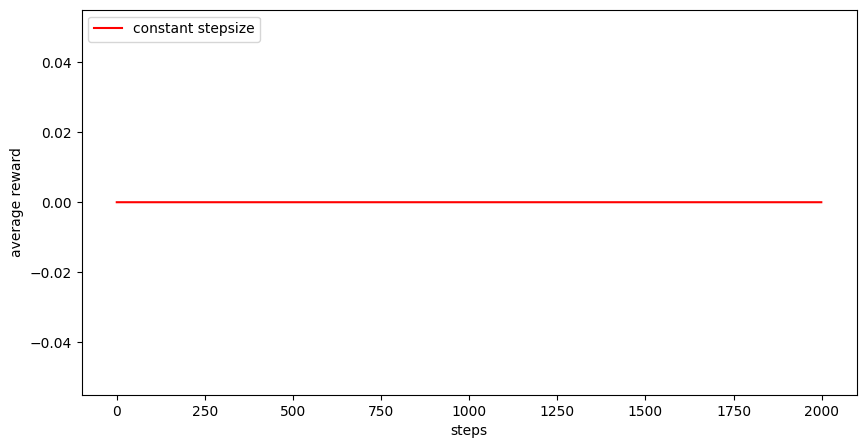

In [23]:
R_c_step=multiarm_constantstep(0.1, 2000, 500, 10,0.1) 
#R_v_step = multiarm_varyingstep(0.1, 1000, 500, 10)

fig = plt.figure(figsize=(10,5))
fig.add_subplot(111)
plt.xlabel('steps')
plt.ylabel('average reward')
plt.plot(R_c_step, 'r', label='constant stepsize')
#plt.plot(R_v_step, 'g', label='varying stepsize')
plt.legend(loc='upper left')
plt.savefig('ex2.5.png', dpi=300)
plt.show()    